In [1]:
import arlpy.uwapm as pm
import numpy as np
x         = np.linspace(-2000, 2000, 1081)
z         = np.linspace(-15, 500,  720)

In [2]:
env = pm.make_env2d(
                
        name            = 'Example',
        
        # ALL: Receiver positions
        rx_range        = x,                                                   # m
        rx_depth        = z,                                                   # m
        
        # ALL: Source freq and depth
        tx_freq         = 35,                                             # Hz
        tx_depth        = 150,                                            # m

        # ALL: Bottom interface
        bot_interface   = np.column_stack((None, 450)),                 # m
                                                        
        # Acousto-elastic bottom boundary 
        bot_boundary    = 'acousto-elastic',
        bot_roughness   = 0.2,                                                 # m (rms)
        bot_density     = 2.3,                                                 # g/cm3
        bot_PwaveSpeed  = 6000,                                                # m/s 
        bot_SwaveSpeed  = 3500,                                                # m/s 
        bot_PwaveAttn   = 0.02,                                                # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                                # dB/wavelength 
        )

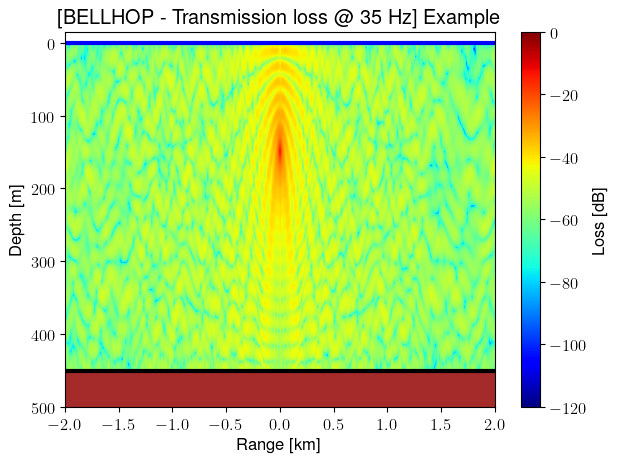

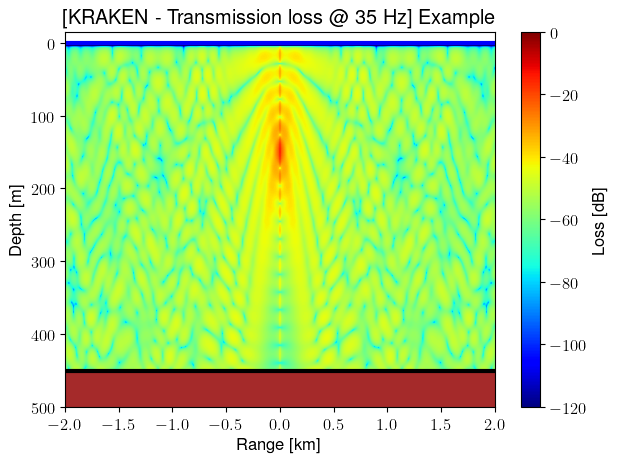

[WARNING] RAM: Output grid depth is not 0 centered, maximum relative error = -0.675 m !


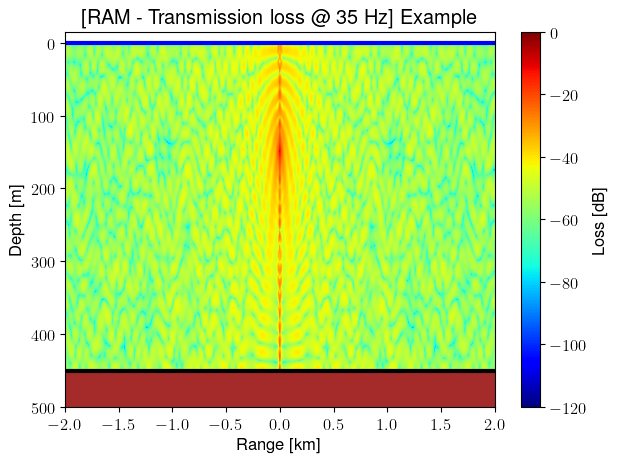

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[RAM - Transmission loss @ 35 Hz] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [3]:
BELLHOP = pm.BELLHOP(env)
BELLHOP.compute_transmission_loss()
BELLHOP.plot_transmission_loss()

KRAKEN = pm.KRAKEN(env)
KRAKEN.compute_transmission_loss()
KRAKEN.plot_transmission_loss()

RAM = pm.RAM(env)
RAM.compute_transmission_loss()
RAM.plot_transmission_loss()


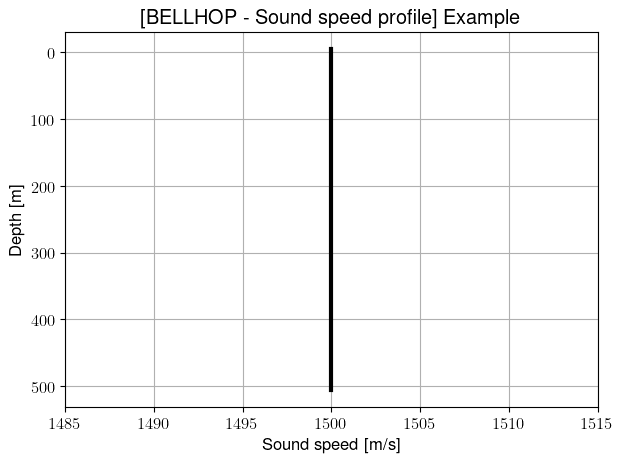

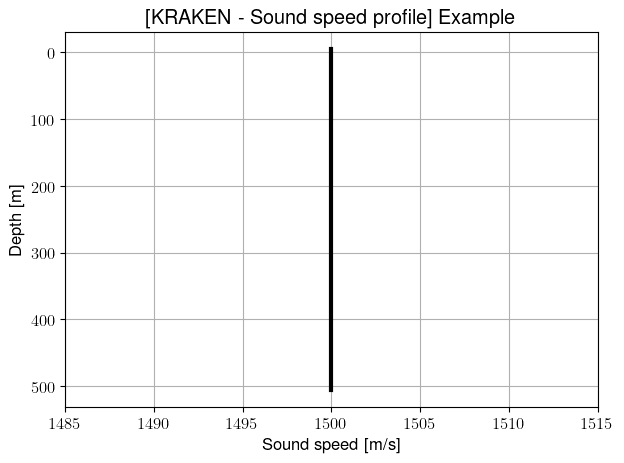

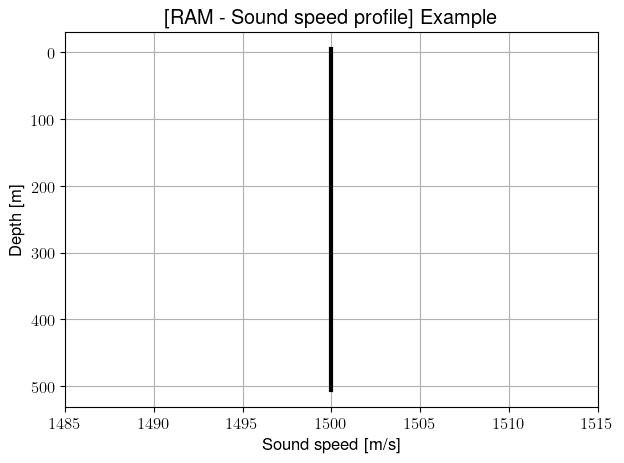

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[RAM - Sound speed profile] Example'}, xlabel='Sound speed [m/s]', ylabel='Depth [m]'>)

In [4]:
BELLHOP.plot_ssp()
KRAKEN.plot_ssp()
RAM.plot_ssp()

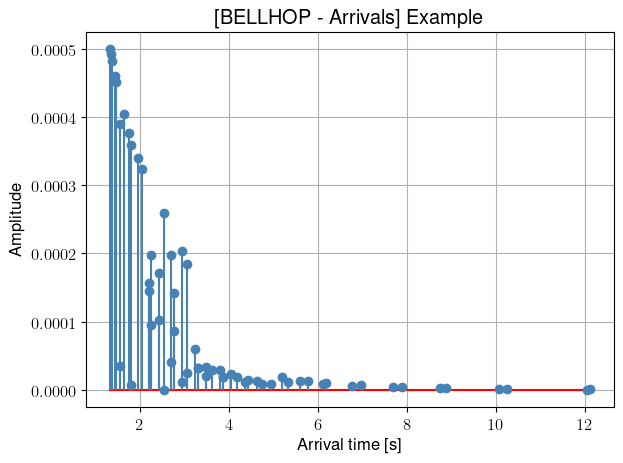

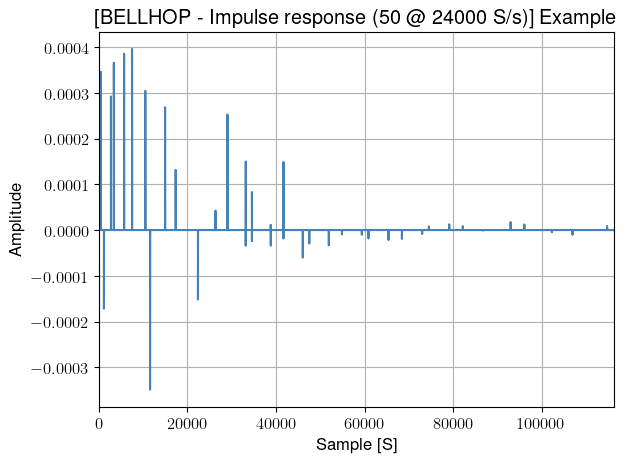

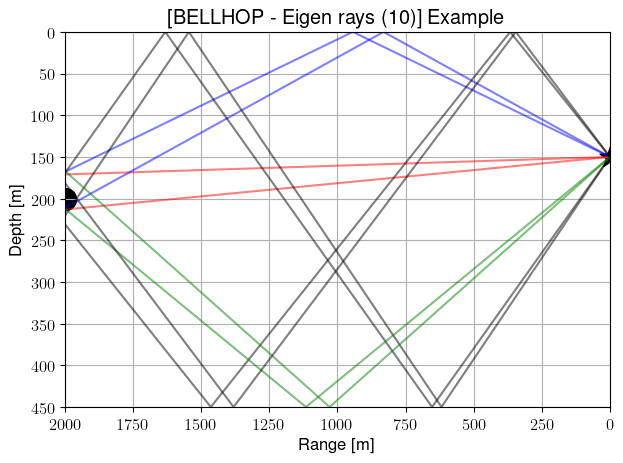

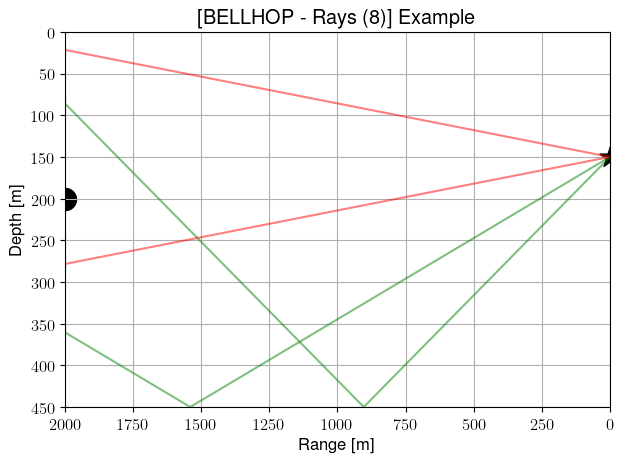

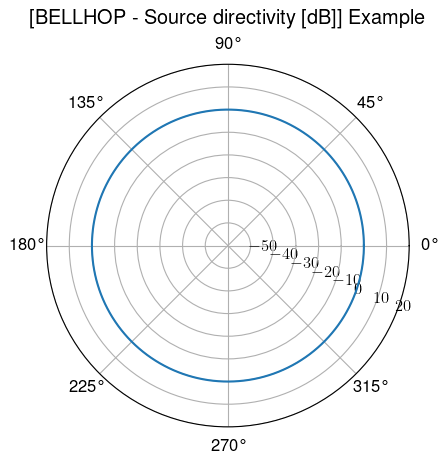

(<Figure size 640x480 with 1 Axes>,
 <PolarAxes: title={'center': '[BELLHOP - Source directivity [dB]] Example'}>)

In [6]:
env['rx_range'] = -2000
env['rx_depth'] = 200
env = pm.make_env2d(**env)    
env = BELLHOP.set_env(env)

BELLHOP.compute_arrivals()
BELLHOP.compute_impulse_respsonse(fs=24000, nArrival=100)
BELLHOP.compute_eigen_rays()
BELLHOP.compute_rays()

BELLHOP.plot_arrivals(nArrival=50)  
BELLHOP.plot_impulse_response(nArrival=50) 
BELLHOP.plot_eigen_rays()  
BELLHOP.plot_rays(nRay=8)   
BELLHOP.plot_beam()